# Train a Neural Network with Provided Data
We only add one hidden layer and use one activation function:

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# You should replace the data with the ones provided in the homework specification
X_train = pd.read_csv('X_train.csv').values.flatten()
y_train = pd.read_csv('y_train.csv').values.flatten()

X_val = pd.read_csv('X_val.csv').values.flatten().reshape(-1,1)
y_val = pd.read_csv('y_val.csv').values.flatten()

X_test = pd.read_csv('X_test.csv').values.flatten().reshape(-1,1)
y_test = pd.read_csv('y_test.csv').values.flatten()

print(X_train)

# sort the test data for plotting
test_data = sorted([(X_test[i], y_test[i]) for i in range(y_test.shape[0])], key=lambda x:x[0])
X_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test)
print(X_test.shape)
print(y_test.shape)

[  2.05783589 -10.52406168  -9.63525368 ...  -0.55139335  -3.92941609
  -9.67720926]
(199, 1)
(199,)


In [6]:
input_layer = layers.Input(shape=(1,)) 
hidden_layer = layers.Dense(800, activation='sigmoid')(input_layer) 
output_layer = layers.Dense(1, activation='linear')(hidden_layer) 

# Create the neural network model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model.summary()
model.layers

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model.evaluate(X_test, y_test)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 800)            │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6280 - val_loss: 0.5080
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.4717 - val_loss: 0.4962
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.4890 - val_loss: 0.5141
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.5057 - val_loss: 0.4972
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.4856 - val_loss: 0.5791
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4943 - val_loss: 0.4996
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4733 - val_loss: 0.5250
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.5080 - val_loss: 0.4991
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.4745 - val_loss: 0.5007
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.4796 - val_loss: 0.5494
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.4924 - val_loss: 0.4843
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 

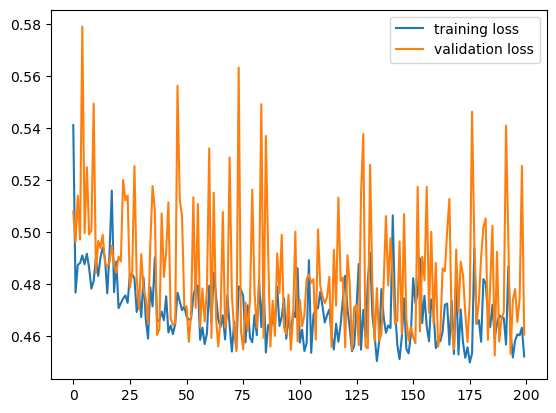

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


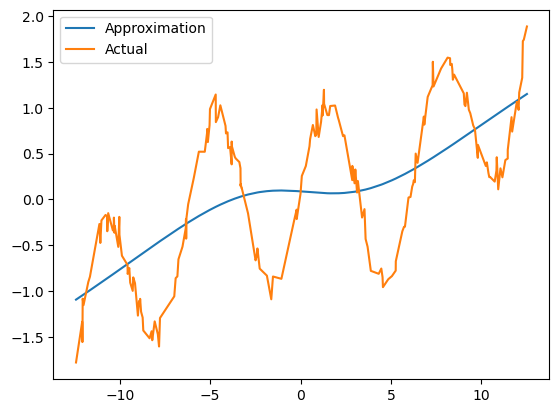

Test error: 0.39917317032814026


In [7]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()

#provide test error
print(f'Test error: {loss}')

# Model Optimization
Try using ReLU and Swish activation functions. In the same time, we increase the number of neurons in different hidden layers and add the number of layers.

In [17]:
input_layer = layers.Input(shape=(1,)) 
hidden_layer1 = layers.Dense(1000, activation='relu')(input_layer) 
hidden_layer2 = layers.Dense(600, activation='swish')(hidden_layer1)
hidden_layer3 = layers.Dense(400, activation='relu')(hidden_layer2)
output_layer = layers.Dense(1, activation='linear')(hidden_layer3) 

# Create the neural network model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model.summary()
model.layers

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model.evaluate(X_test, y_test)
print(f'Test error: {loss}')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 600)            │       600,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 400)            │       240,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,401 (3.22 MB)

 Trainable params: 843,401 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6431 - val_loss: 0.4739
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4526 - val_loss: 0.4577
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4483 - val_loss: 0.3483
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3083 - val_loss: 0.2760
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2691 - val_loss: 0.2110
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1964 - val_loss: 0.1832
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1646 - val_loss: 0.1840
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1601 - val_loss: 0.1596
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1352 - val_loss: 0.1649
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1270 - val_loss: 0.1387
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1222 - val_loss: 0.1322
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1

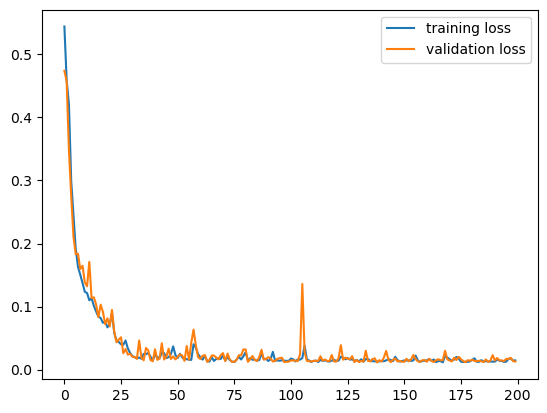

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


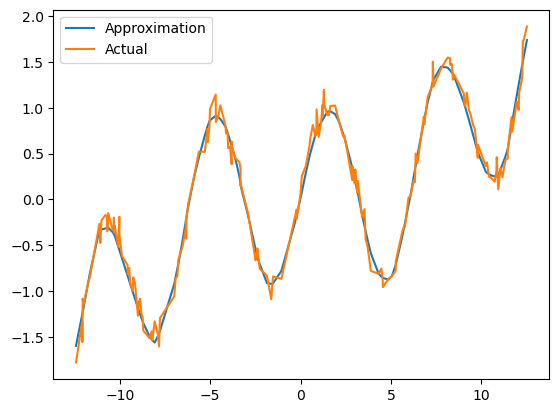

Test error: 0.012090164236724377


In [18]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)

# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_test, label='Actual')
plt.legend()
plt.show()

#provide test error
print(f'Test error: {loss}')

# Conclusion
Compared with the original model, we improve the model performance by increasing the number of neurons in the hidden layers, which enlarges the capacity to represent the intricate relationships in the data.

Plus, we use advanced activation functions like ReLU and Swish that performs better non-linear transformation. 

Last but not least, we add more hidden layers in the model, alllowing the network to learn complex data in a more structured way.

In a nutshell, all the modifications above greatly improve the model performance.